# Data Challenge: ONGONO OLINGA Jean-Galbert

L'objectif de ce data challenge est d'obtenir le score le plus élevé de reconnaissance de photo de personnes sur la base de données de taille élevée (9 millions). 

    Dans ce notebook, notre démarche pour le data challenge a été la suivante:
    
        - Déterminer les meilleurs paramètres d'un modèle Random Forest à partir un model GridSearchCV
        
        - Appliquer le classifieur Random Forest sur les données de train telles que spécifiées dans l'énoncé
        
        - Sélectionner les variables du jeu de données qui ne contribuent pas de façon pertinente
        
        - ôter ces variables et reestimer le même randomforest (Le but étant d'obtenir le score élévé)! Dans un    cas plus pratique, même si la contribution de la variable peut est très faible il serait mieux de ne pas l'ôter du jeu de données
        
        
        - Moyen employé: Google Colab

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [0]:
# path config
from google.colab import drive
drive.mount('/content/drive')
data_path = './drive/My Drive/Colab Notebooks/data_challenge'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
xtrain = pd.read_csv('./drive/My Drive/Colab Notebooks/data_challenge/xtrain_challenge.csv')
xtrain

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
0,1.0,0.0,0.0,-6.24,-5.27,-1.86,0.63,3.27,0.89,350.98,64.86,0.0,1.00,1.0,0.0,0.0,-9.44,-12.53,0.84,2.59,1.53,1.03,276.02,58.02,0.0,1.00,2405.94,1981.09,2677.84,2470.44,1579.39,2185.79,2118.77,2580.99,2498.04,3180.58,2718.29
1,1.0,0.0,0.0,-0.42,-4.50,-4.31,1.61,1.72,2.76,347.06,28.85,0.0,0.99,1.0,0.0,0.0,-0.35,-18.97,-1.31,1.23,0.84,0.34,263.84,30.50,0.0,1.00,3241.37,2015.24,3987.19,3343.53,2894.69,2947.34,2689.42,3763.51,2544.22,3515.58,3247.49
2,1.0,0.0,0.0,33.76,-19.29,2.71,1.73,1.32,1.53,135.94,57.65,1.0,0.01,1.0,0.0,0.0,-12.58,-9.99,-0.15,1.21,0.34,1.60,357.67,51.98,1.0,1.00,2199.22,2549.59,2164.41,2100.69,1294.35,2136.04,1644.05,2308.05,1774.88,3005.79,2507.02
3,1.0,0.0,0.0,-2.82,-8.04,3.04,0.94,2.92,0.09,288.07,21.23,0.0,0.94,1.0,0.0,0.0,1.57,-13.22,-2.66,1.18,0.23,0.38,268.44,24.59,0.0,0.19,2390.40,2141.75,2086.02,2154.69,1247.48,1903.36,2232.54,2146.34,2201.53,3315.03,2274.76
4,1.0,0.0,0.0,3.56,-10.61,-0.65,0.19,1.04,2.10,166.12,37.36,1.0,0.00,1.0,0.0,0.0,20.03,-15.53,-1.21,1.31,0.23,1.25,172.19,26.14,0.0,1.00,1822.14,2202.60,2150.07,2194.25,1575.43,2345.59,1976.82,1440.78,2061.06,2927.96,2073.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800708,1.0,0.0,0.0,6.93,-3.08,-1.19,1.14,1.61,1.04,217.96,49.99,0.0,1.00,1.0,0.0,0.0,-0.03,0.02,0.10,0.54,0.58,0.85,311.47,23.89,0.0,1.00,1992.62,1860.16,1737.14,2004.58,1383.97,1920.82,2114.38,1853.61,2316.68,2808.22,2009.50
9800709,1.0,0.0,0.0,-2.55,-4.46,1.73,0.04,0.07,0.08,300.28,32.63,0.0,1.00,1.0,0.0,0.0,2.09,-19.62,-2.63,1.79,1.12,0.51,335.37,24.56,0.0,1.00,5976.93,4397.46,6862.02,8158.80,7393.91,6670.03,7471.60,6433.00,7949.63,6921.60,7307.50
9800710,1.0,0.0,0.0,-5.69,-13.48,-1.21,5.36,1.86,1.31,88.98,53.11,0.0,1.00,1.0,0.0,0.0,-6.14,-12.95,-1.54,0.46,0.18,1.80,358.78,51.10,0.0,1.00,1527.87,1330.32,2201.89,1426.91,1426.24,2203.92,1502.89,2038.32,1851.13,2935.59,1841.06
9800711,1.0,0.0,0.0,1.59,-16.95,0.75,0.62,0.34,0.29,225.22,22.59,1.0,0.00,1.0,0.0,0.0,0.19,-3.35,-0.63,1.41,0.18,0.28,336.35,28.33,0.0,0.00,1873.27,1896.30,2414.30,2430.21,1843.88,2349.95,1996.40,1962.01,2305.88,3010.01,2253.48


In [0]:
ytrain = pd.read_csv('./drive/My Drive/Colab Notebooks/data_challenge/ytrain_challenge.csv')
ytrain

,y
0,0
1,0
2,0
3,0
4,0
...,...
9800708,0
9800709,1
9800710,0
9800711,0


In [0]:
xtest = pd.read_csv('./drive/My Drive/Colab Notebooks/data_challenge/xtest_challenge.csv')
xtest

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
0,0.99,0.0,0.00,0.04,-7.69,0.35,2.10,3.68,0.49,222.03,23.88,0.0,0.00,1.00,0.00,0.0,-0.01,-0.51,-0.83,0.68,1.35,0.63,196.71,23.31,0.0,0.0,3308.74,2052.72,2257.02,2846.83,2075.63,2390.70,3055.43,1901.36,2767.60,3493.12,3167.00
1,1.00,0.0,0.00,-5.14,-13.45,-5.66,0.77,1.55,1.09,268.17,40.55,0.0,1.00,1.00,0.00,0.0,2.06,-11.48,-0.40,0.81,1.29,0.02,275.05,58.68,0.0,1.0,1567.41,1699.62,2166.45,1927.15,1510.80,1944.31,2399.55,1850.24,1856.17,3221.19,2108.69
2,1.00,0.0,0.00,-5.00,-18.77,-2.04,0.33,0.08,0.49,340.35,30.67,1.0,1.00,1.00,0.00,0.0,-7.44,-7.82,-9.17,2.91,1.91,0.80,172.25,47.28,0.0,1.0,2028.07,1856.16,2063.60,1706.31,1864.16,2732.82,1662.13,1925.22,2192.00,2890.87,2349.69
3,1.00,0.0,0.00,-1.54,0.64,-0.31,1.85,0.50,1.30,297.40,21.56,0.0,1.00,1.00,0.00,0.0,-0.19,-7.72,-1.23,1.34,0.30,0.75,252.66,23.99,0.0,1.0,8736.10,6303.64,9724.88,9029.90,13025.53,8834.54,9735.16,10656.57,10127.11,7221.34,8376.18
4,1.00,0.0,0.00,4.23,-13.83,0.44,0.32,1.18,1.34,252.48,58.20,0.0,1.00,0.45,0.55,0.0,-27.52,0.11,3.59,1.40,0.52,0.36,236.15,64.61,0.0,1.0,2440.32,1829.10,2965.89,2642.69,2474.64,2712.93,1790.79,2662.68,2145.18,3208.88,2829.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768306,1.00,0.0,0.00,-2.35,-7.13,-5.04,0.64,1.08,2.27,197.79,45.50,0.0,1.00,1.00,0.00,0.0,-9.42,6.02,-0.19,0.87,0.52,1.53,266.65,36.01,0.0,1.0,2281.44,1855.11,1531.82,1852.47,1648.27,1764.47,1813.83,1402.46,2289.62,2658.42,2071.81
3768307,1.00,0.0,0.00,2.72,-14.88,-3.22,0.68,0.29,0.73,192.50,33.48,0.0,1.00,1.00,0.00,0.0,-4.38,1.89,-0.18,0.88,0.87,1.19,194.32,28.47,0.0,1.0,2493.09,2195.41,3067.64,2703.63,1876.94,2704.31,2465.81,2442.82,3121.25,3340.16,2793.75
3768308,0.98,0.0,0.02,2.88,4.52,-12.49,1.05,0.73,0.84,322.31,22.10,0.0,0.19,1.00,0.00,0.0,25.72,0.49,-2.01,2.24,0.30,0.02,274.77,28.93,0.0,1.0,2958.73,1993.48,2133.12,2522.65,2256.27,2570.29,1980.78,2281.71,2527.80,3162.12,2734.31
3768309,1.00,0.0,0.00,1.15,-29.84,0.39,1.75,0.24,2.70,170.55,37.56,0.0,0.00,1.00,0.00,0.0,-0.73,-8.82,1.56,1.39,0.18,0.96,195.46,25.38,0.0,0.0,2098.62,2903.59,2391.29,2348.01,1487.64,1761.24,2281.57,2059.51,1982.95,2670.39,2096.89


## GridSearchCV model for tuning parameters

In [0]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[100,300,700,850, 1000,1200,1500,3000, 6000, 1000, 10000],
    "max_depth":[8,16,32,64,76,88, 100, None]
}
cv = GridSearchCV(rfc, parameters, cv = 10)
cv.fit(xtrain, ytrain)


In [0]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [0]:
display(cv)

    GridSearchCV shows 'n_estimators' = 100 and 'max_depth' = 8. Results are not printed because we try other models in the same notebook

### Fitting Random Forest Classification to the Training set

In [0]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 10, max_depth=8,class_weight='balanced')
#classifier = DecisionTreeClassifier(criterion='gini', random_state=1000, max_depth=5, max_leaf_nodes=8)
#classifier = LogisticRegression(random_state=10, max_iter=10000, solver='lbfgs')
#classifier = GradientBoostingClassifier(random_state=1000,  n_estimators=10000, max_depth=6, min_samples_leaf=1)
#classifier = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)
classifier.fit(xtrain, ytrain)

### Calculate the performance metric

In [ ]:
yvalid_scoreordered = ytrain[nrows_train:(nrows_train + nrows_valid)][np.argsort(yvalid)]
print(yvalid_scoreordered)
N = np.sum(ytrain[nrows_train:(nrows_train + nrows_valid)] == 0)
P = np.sum(ytrain[nrows_train:(nrows_train + nrows_valid)] == 1)
FP = 0
TP = 0
for i in range(nrows_valid - 1, -1, -1):
    if (yvalid_scoreordered[i] == 1):
        TP = TP + 1
    else:
        FP = FP + 1
    if (FP / N > 10**-4):
        FP = FP - 1
        break
print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")

### Classify the provided test data

In [0]:
#y_pred = classifier.predict(xtest)
ytest = classifier.predict_proba(xtest)[:,classifier.classes_ == 1][:,0]
print(ytest.shape)

In [0]:
np.savetxt('./drive/My Drive/Colab Notebooks/data_challenge/ytest_challenge_student_RF.csv', ytest, fmt = '%1.15f', delimiter=',')

**Let's check what features are not important in the dataset**

In [0]:
feature_imp = pd.Series(classifier.feature_importances_, index=xtrain.columns.values).sort_values(ascending=False)
feature_imp

s9      0.202635
s4      0.171398
s11     0.141486
s10     0.110299
s8      0.083800
s5      0.068583
s7      0.056682
s3      0.038070
s6      0.037080
s1      0.025883
s2      0.018046
qr10    0.011700
qs10    0.010025
qr4     0.002199
qr5     0.002087
qs5     0.002072
qs4     0.001695
qr7     0.001687
qs7     0.001636
qr9     0.001367
qs11    0.001344
qr6     0.001298
qs6     0.001265
qr11    0.001199
qs8     0.001096
qs9     0.001075
qr8     0.001055
qr12    0.000698
qs12    0.000570
qr13    0.000383
qs13    0.000375
qr1     0.000280
qs1     0.000264
qr2     0.000183
qs2     0.000176
qr3     0.000159
qs3     0.000148
dtype: float64

### Vizualizing important features in the dataset

No handles with labels found to put in legend.


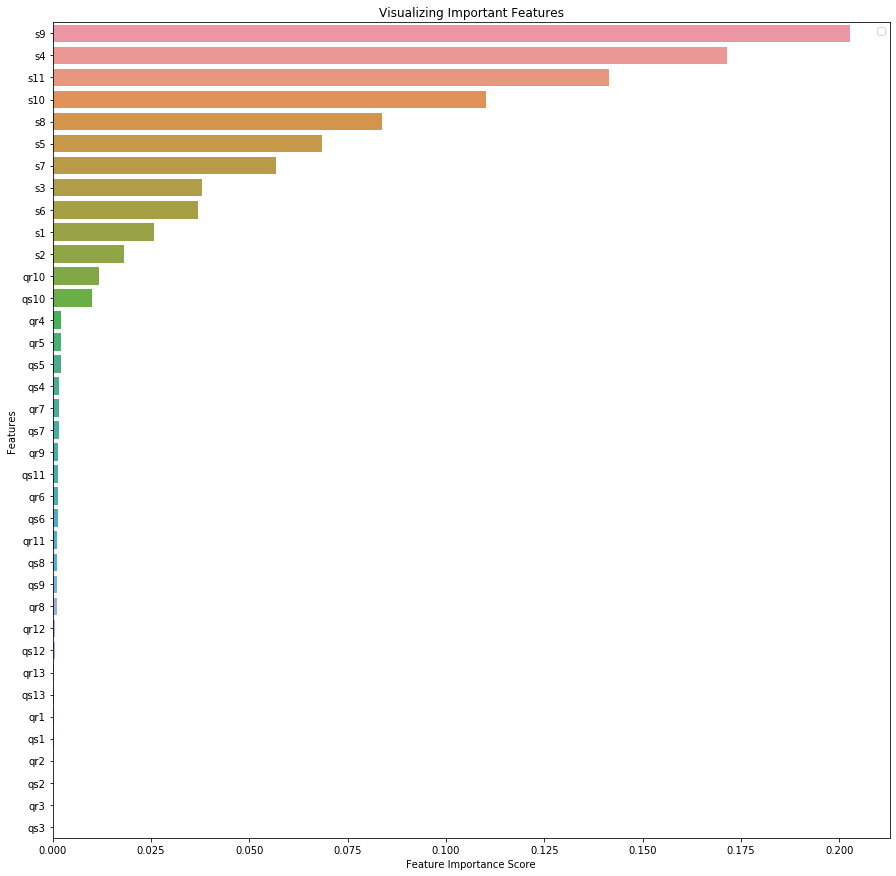

In [0]:
import seaborn as sns
%matplotlib inline
sns.mpl.rc("figure", figsize=(15,15))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Removing less important features

In [0]:
X_train = xtrain[['s9', 's4','s11','s10','s8','s5','s7','s3','s6','s1','s2','qr10','qs10']]
X_train

,s9,s4,s11,s10,s8,s5,s7,s3,s6,s1,s2,qr10,qs10
0,2498.04,2470.44,2718.29,3180.58,2580.99,1579.39,2118.77,2677.84,2185.79,2405.94,1981.09,276.02,350.98
1,2544.22,3343.53,3247.49,3515.58,3763.51,2894.69,2689.42,3987.19,2947.34,3241.37,2015.24,263.84,347.06
2,1774.88,2100.69,2507.02,3005.79,2308.05,1294.35,1644.05,2164.41,2136.04,2199.22,2549.59,357.67,135.94
3,2201.53,2154.69,2274.76,3315.03,2146.34,1247.48,2232.54,2086.02,1903.36,2390.40,2141.75,268.44,288.07
4,2061.06,2194.25,2073.16,2927.96,1440.78,1575.43,1976.82,2150.07,2345.59,1822.14,2202.60,172.19,166.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800708,2316.68,2004.58,2009.50,2808.22,1853.61,1383.97,2114.38,1737.14,1920.82,1992.62,1860.16,311.47,217.96
9800709,7949.63,8158.80,7307.50,6921.60,6433.00,7393.91,7471.60,6862.02,6670.03,5976.93,4397.46,335.37,300.28
9800710,1851.13,1426.91,1841.06,2935.59,2038.32,1426.24,1502.89,2201.89,2203.92,1527.87,1330.32,358.78,88.98
9800711,2305.88,2430.21,2253.48,3010.01,1962.01,1843.88,1996.40,2414.30,2349.95,1873.27,1896.30,336.35,225.22


In [0]:
X_test = xtest[['s9', 's4','s11','s10','s8','s5','s7','s3','s6','s1','s2','qr10','qs10']]
X_test

,s9,s4,s11,s10,s8,s5,s7,s3,s6,s1,s2,qr10,qs10
0,2767.60,2846.83,3167.00,3493.12,1901.36,2075.63,3055.43,2257.02,2390.70,3308.74,2052.72,196.71,222.03
1,1856.17,1927.15,2108.69,3221.19,1850.24,1510.80,2399.55,2166.45,1944.31,1567.41,1699.62,275.05,268.17
2,2192.00,1706.31,2349.69,2890.87,1925.22,1864.16,1662.13,2063.60,2732.82,2028.07,1856.16,172.25,340.35
3,10127.11,9029.90,8376.18,7221.34,10656.57,13025.53,9735.16,9724.88,8834.54,8736.10,6303.64,252.66,297.40
4,2145.18,2642.69,2829.17,3208.88,2662.68,2474.64,1790.79,2965.89,2712.93,2440.32,1829.10,236.15,252.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768306,2289.62,1852.47,2071.81,2658.42,1402.46,1648.27,1813.83,1531.82,1764.47,2281.44,1855.11,266.65,197.79
3768307,3121.25,2703.63,2793.75,3340.16,2442.82,1876.94,2465.81,3067.64,2704.31,2493.09,2195.41,194.32,192.50
3768308,2527.80,2522.65,2734.31,3162.12,2281.71,2256.27,1980.78,2133.12,2570.29,2958.73,1993.48,274.77,322.31
3768309,1982.95,2348.01,2096.89,2670.39,2059.51,1487.64,2281.57,2391.29,1761.24,2098.62,2903.59,195.46,170.55


### A new train with the new database

In [0]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 10, max_depth=100,class_weight='balanced')
classifier.fit(X_train, ytrain)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

### Classification of test data

In [0]:
ytest = classifier.predict_proba(X_test)[:,classifier.classes_ == 1][:,0]
print(ytest.shape)

In [0]:
np.savetxt('./drive/My Drive/Colab Notebooks/data_challenge/ytest_challenge_student_RF.csv', ytest, fmt = '%1.15f', delimiter=',')

    Les résultats ce sont considérablement améliorés et correspondent à ceux afficher dans sur le site http://datachallenge.enst.fr/

### Training XG-boost

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.007,
    n_estimators=1000,
    max_depth = 3,
    min_child_weight = 5,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
xgb.fit(X_train, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[08:52:44] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.4,
              learning_rate=0.007, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.55, verbosity=1)

In [0]:
# Classify the provided test data
ytest = xgb.predict_proba(X_test)[:,xgb.classes_ == 1][:,0]
print(ytest.shape)

(3768311,)


In [0]:
np.savetxt('./drive/My Drive/Colab Notebooks/data_challenge/ytest_challenge_student_XGB.csv', ytest, fmt = '%1.15f', delimiter=',')

### Conclusion: results were less important than the random forest model

### Trying: training a Xgboost with n_estimators = 10000

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.01, n_estimators=10000, 
                    max_depth=29, min_child_weight=6,gamma=0.1, subsample=0.8, colsample_bytree=0.8,n_jobs=4)
xgb.fit(xtrain, ytrain)

### Classify the provided test data

In [ ]:
ytest = xgb.predict_proba(xtest)[:,xgb.classes_ == 1][:,0]
print(ytest.shape)

In [ ]:
np.savetxt('./drive/My Drive/Colab Notebooks/data_challenge/ytest_challenge_student_GB.csv', ytest, fmt = '%1.15f', delimiter=',')

...